# STA 141B: Homework 3

Fall 2018

## Information

After the colons (in the same line) please write just your first name, last name, and the 9 digit student ID number below.

First Name: Ryan

Last Name: Gosiaco

Student ID: 912819444

## Instructions

### New item: Please print your answer notebook to pdf (make sure that it is not too many pages, > 10, due to long output) and submit as the homework solution with your zip file.

We use a script that extracts your answers by looking for cells in between the cells containing the exercise statements.  So you 

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax

### Introduction

The US Department of Agriculture publishes price estimates for fruits and vegetables [online](https://www.ers.usda.gov/data-products/fruit-and-vegetable-prices/fruit-and-vegetable-prices/). The most recent estimates are based on a 2013 survey of US retail stores.

The estimates are provided as a collection of MS Excel files, with one file per fruit or vegetable. The `hw3_data.zip` file contains the fruit and vegetable files in the directories `fruit` and `vegetables`, respectively.

__Exercise 1.__ Use pandas to extract the "Fresh" row(s) from the <strong style="color:#B0B">fruit</strong> Excel files. Combine the data into a single data frame. Your data frame should look something like this:

type       | food       | form   | price_per_lb | yield | lb_per_cup | price_per_cup
---------- | ---------- | ------ | ------------ | ----- | ---------- | -------------
fruit      | watermelon | Fresh1 | 0.333412     | 0.52  | 0.330693   | 0.212033
fruit      | cantaloupe | Fresh1 | 0.535874     | 0.51  | 0.374786   | 0.3938
vegetables | onions     | Fresh1 | 1.03811      | 0.9   | 0.35274    | 0.406868
...        |            |        |              |       |            |


It's okay if the rows and columns of your data frame are in a different order. These modules are especially relevant:

* [`str` methods](https://docs.python.org/2/library/stdtypes.html#string-methods)
* [`os`](https://docs.python.org/2/library/os.html)
* [`os.path`](https://docs.python.org/2/library/os.path.html)
* [pandas](http://pandas.pydata.org/pandas-docs/stable/): `read_excel()`, `concat()`, `.fillna()`, `.str`, plotting methods

Ask questions and search the documentation/web to find the functions you need.


In [1]:
import os
import os.path
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
def get_data(folder_name):
    """Read in all excel files in folder named folder_name
    and turn into dataframe with proper types
    
    Args:
        folder_name (str): Name of the folder 
        
    Returns:
        df: Dataframe containing the "Fresh1" rows from each file in the folder
    """
    path = os.getcwd()
    path1 = os.path.join(path, folder_name)
    names= os.listdir(path1)
    names.sort()
    #Create dataframe with each file name
    title = pd.DataFrame(columns=[folder_name])
    for line in names:
        title = title.append({folder_name:line.split('.')[0]}, ignore_index=True)
    #Create dataframe with each 'Fresh1' row from each file
    df = pd.DataFrame()
    for i in range(len(names)):
        data=pd.read_excel(path1+'/'+names[i],header=1)
        row = data[data['Form'].str.contains('Fresh1', na = False)]
        row.insert(loc=0, column=folder_name, value=title.iloc[[i]])
        df = df.append(row, ignore_index=True, sort=False)
    #clean up df and fix column names
    df[folder_name] = title
    df.drop(df.columns[[3, 6, 8, 9]], axis = 1, inplace=True)
    df.columns = ['food', 'form', 'price_per_lb', 'yield', 'lb_per_cup', 'price_per_cup']
    df.insert(loc=0, column='type', value=folder_name)
    df.fillna(np.nan)
    #fix datatypes for numeric columns
    df['price_per_lb'] = pd.to_numeric(df['price_per_lb'], errors='coerce')
    df['yield'] = pd.to_numeric(df['yield'], errors='coerce')
    df['lb_per_cup'] = pd.to_numeric(df['lb_per_cup'], errors='coerce')
    df['price_per_cup'] = pd.to_numeric(df['price_per_cup'], errors='coerce')
    return df

In [3]:
fruit = get_data('fruit')
#Print first 5 lines to avoid long output
fruit.head()

,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup
0,fruit,apples,Fresh1,1.567515,0.90,0.242508,0.422373
1,fruit,apricots,Fresh1,3.040072,0.93,0.363763,1.189102
2,fruit,bananas,Fresh1,0.566983,0.64,0.330693,0.292965
3,fruit,berries_mixed,NaN,NaN,NaN,NaN,NaN
4,fruit,blackberries,Fresh1,5.774708,0.96,0.319670,1.922919


In [4]:
print(fruit.shape)

(29, 7)


__Exercise 2.__ Reuse your code from exercise 1.1 to extract the "Fresh" row(s) from the <strong style="color:#B0B">vegetable</strong> Excel files.

Does your code produce the correct prices for tomatoes? If not, why not? Do any other files have the same problem as the tomatoes file?

You don't need to extract the prices for these problem files. However, make sure the prices are extracted for files like asparagus that don't have this problem.

In [5]:
vegetables = get_data('vegetables')
#Print first 5 lines to avoid long output
vegetables.head()

,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup
0,vegetables,acorn_squash,Fresh1,1.172248,0.458554,0.451948,1.155360
1,vegetables,artichoke,Fresh1,2.213050,0.375309,0.385809,2.274967
2,vegetables,asparagus,Fresh1,3.213494,0.493835,0.396832,2.582272
3,vegetables,avocados,Fresh1,2.235874,0.740753,0.319670,0.964886
4,vegetables,beets,NaN,NaN,NaN,NaN,NaN


My code does not get the correct prices for tomatoes and for a few other vegetables (cauliflower, celery, mushrooms, spinach, etc).
<br>
These files have subcategories for the `'Fresh'` form such as other types of that vegetable.
<br>
Also, I am only filtering for `'Fresh1'` and the tomatoes file has `'Fresh'` instead but this is irrelevant since that row is still empty.

In [6]:
print(vegetables.shape)

(44, 7)


__Exercise 3.__ Remove rows without a price from the vegetable data frame and then combine the fruit and vegetable data frames. Make sure all columns of numbers are numeric (not strings).

In [7]:
fruit = fruit.dropna()
vegetables = vegetables.dropna()
food = pd.concat([fruit, vegetables])
food.shape

(45, 7)

In [8]:
food.dtypes

type              object
food              object
form              object
price_per_lb     float64
yield            float64
lb_per_cup       float64
price_per_cup    float64
dtype: object

__Exercise 4.__ Discuss the questions below (a paragraph each is sufficient). Use plots to support your ideas.

* What kinds of fruits are the most expensive (per pound)? What kinds are the least expensive?
* How do the price distributions compare for fruit and vegetables?
* Which foods are the best value for the price?
* What's something surprising about this data set?
* Which foods do you expect to provide the best combination of price, yield, and nutrition? A future assignment may combine this data set with another so you can check your hypothesis.

### What kinds of fruits are the most expensive (per pound)? What kinds are the least expensive?

In [9]:
sorted_food = food[food['type'] == 'fruit'].sort_values('price_per_lb', ascending=False) #Filter fruits and sort by price
sorted_food.head()

,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup
25,fruit,raspberries,Fresh1,6.975811,0.96,0.319670,2.322874
4,fruit,blackberries,Fresh1,5.774708,0.96,0.319670,1.922919
5,fruit,blueberries,Fresh1,4.734622,0.95,0.319670,1.593177
7,fruit,cherries,Fresh1,3.592990,0.92,0.341717,1.334548
1,fruit,apricots,Fresh1,3.040072,0.93,0.363763,1.189102


In [10]:
sorted_food.tail()

,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup
14,fruit,honeydew,Fresh1,0.796656,0.46,0.374786,0.649077
22,fruit,pineapple,Fresh1,0.627662,0.51,0.363763,0.447686
2,fruit,bananas,Fresh1,0.566983,0.64,0.330693,0.292965
6,fruit,cantaloupe,Fresh1,0.535874,0.51,0.374786,0.393800
28,fruit,watermelon,Fresh1,0.333412,0.52,0.330693,0.212033


The most expensive are raspberries (`$6.98`), blackberries (`$5.77`), blueberries (`$4.73`), and cherries (`$3.59`).
<br>
These expensive fruits are all berries which makes sense because of their size makes harvesting, transportation, and processing difficult.
<br>
The least expensive are watermelon (`$0.33`), cantaloupe (`$0.54`), bananas (`$0.57`), and pineapple (`$0.63`).
<br>
The least expensive fruits are very common fruits and are on the larger side when compared to the expensive berries which means that transporting and processing are not as tedious.

### How do the price distributions compare for fruit and vegetables?

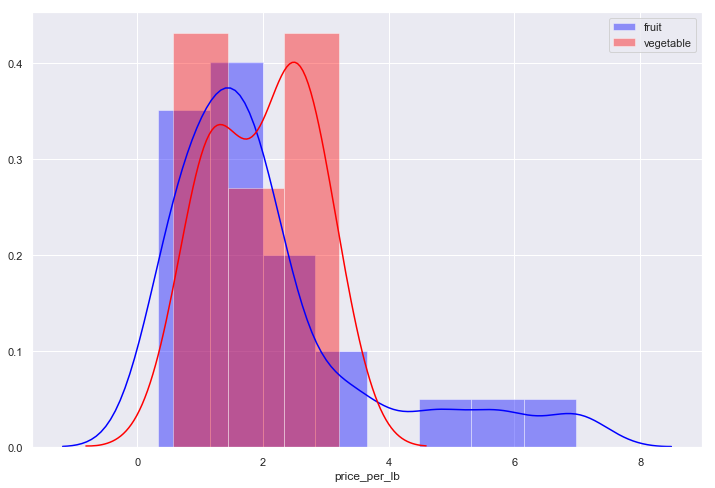

In [11]:
sns.set(color_codes=True)
plt.rcParams["figure.figsize"] = [12.0, 8.0]
sns.distplot(fruit['price_per_lb'], color='blue', label='fruit')
sns.distplot(vegetables['price_per_lb'], color='red', label='vegetable')
plt.legend()

The price distribution for fruits is centered around `$1.5` or so dollars per pound and most fruits are less than `$4` per pound.
<br>
The price distribution for vegetables has two distinct peaks at around `$1` per pound and `$3` per pound. Also, all of the vegetables are less than `$4` per pound.
<br>
The graph shows that most fruits are generally cheaper vegetables.

### Which foods are the best value for the price?

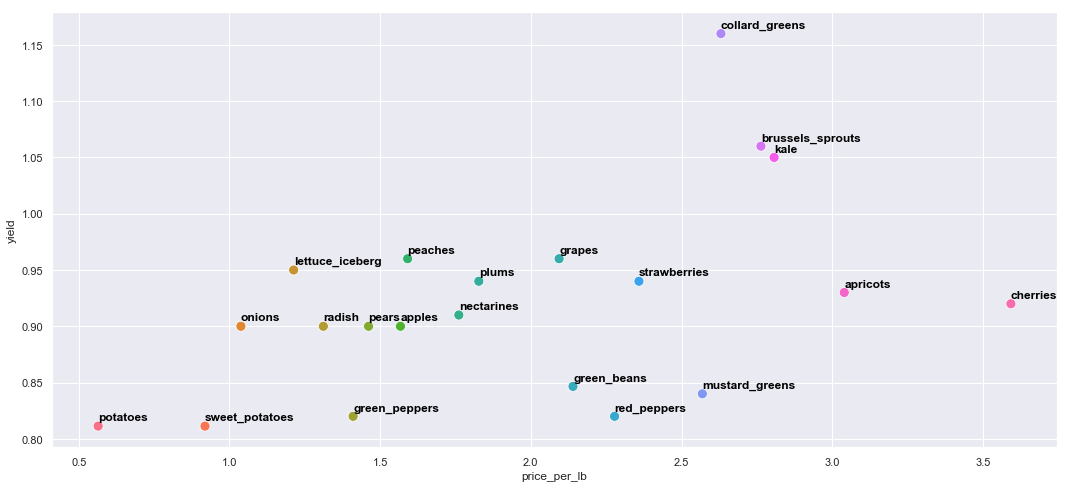

In [12]:
plt.rcParams["figure.figsize"] = [18.0,8.0]
food = food.sort_values('price_per_lb')
#Filter out foods with a yield less than 0.8 and a price higher than $4
food = food[food['yield'] > 0.8]
food = food[food['price_per_lb'] < 4]
p1 = sns.scatterplot(x=food['price_per_lb'], y=food['yield'], hue='food', data=food, s=100, legend=None)
for line in range(0,food.shape[0]):
     p1.text(food.iloc[line,3], food.iloc[line,4]+0.005, food.iloc[line,1], horizontalalignment='left', size='medium', color='black', weight='semibold')    
plt.show()

I defined best value for the price as maximizing the yield while minimizing the price per pound.
<br>
Therefore, we are looking for points on the graph that are closest to the upper left quadrant which is why my graph only includes foods that have a yield higher than `0.8` and a price lower than `$4`.
<br>
Between `$0` and `$1`, the foods that are the best value are potatoes and sweet potatoes.
<br>
Between `$1` and `$2`, the foods that are the best value are onions, iceberg lettuce, peaches, plums.
<br>
Between `$2` and `$3`, the foods that are the best value are grapes, strawberries, collard greens, brussel sprouts and kale.
<br>
Between `$3` and `$4`, the foods that are the best value are apricots and cherries.
<br>
The overall best value would either be potatoes or collard greens because potatoes have a very high yield at a low price and collard greens have a yield above `1` at a fair price.

### What's something surprising about this data set?

Many of the vegetables have various fresh forms which means that those vegetables were excluded from the dataset.
<br>
Another interesting thing to note is that many fruits and vegetables are below `$3` per pound.
<br>
Also, a few vegetables (collard greens, kale, and brussel sprouts) had a yield above `1`. This means that when they are prepared, they actually give more than their weight.
<br>
Another interesting thing is that each food has a price per cup which means whoever created this data had to weight the amount of food that equates to a cup.
<br>
Also, rather than having subcategories for each bean in one main bean file, each bean type has a different file which helps keep the files tidy because each bean seems to have two forms: canned and dried. Having all of the beans in one file would make a very complex file that is hard to look at.

### Which foods do you expect to provide the best combination of price, yield, and nutrition? A future assignment may combine this data set with another so you can check your hypothesis.

I expect foods such as potatoes, sweet potatoes, collard greens, brussel sprouts, and kale to give the best combination of price, yield, and nutrition.
<br>
These foods provide the best value among the other foods. Also, some of these foods are commonly reffered to as 'superfoods' due to the nutrients they contain.